# matplotlib基础

众所周知，matplotlib的图表是由艺术家使用渲染器在画布上完成的。

其API自然分为3层：

- 画布是绘制图形的区域：matplotlib.backend_bases.FigureCanvas 
- 渲染器是知晓如何在画布上绘制的对象：matplotlib.backend_bases.Renderer 
- 艺术家是知晓如何使用渲染器在画布上绘制的对象：matplotlib.artist.Artist

FigureCanvas和Renderer处理与诸如wxPython之类的用户界面工具包，或PostScript®之类的绘图语言会话的所有细节，而Artist处理所有高级结构，如表示和布置图形，文本和线条。

艺术家有两种类型：图元与容器。图元表示绘制在画布上的标准图形对象，如：Line2D，Rectangle，Text，AxesImage等，容器是放置图元的位置如：Axis，Axes和Figure。标准用法是创建一个Figure实例，使用Figure来创建一个或多个Axes或Subplot实例，并使用Axes实例的辅助方法创建图元。

有很多人将Figure当作画布，其实它是长的像画布的艺术家。

<@-<

既然是基础，我们就从最简单的地方开始。

path模块处理matplotlib中所有的polyline
而处理polyline的基础类是Path
Path与MarkerStyle一样，基类都是object而不是Artist

为什么我会知道MarkerStyle，过程时这样的，我在写[Python可视化实践-手机篇]时，图1想从散点图改成折线图，但有几个问题没想明白，就想认真的学一遍plot折线图，我们都知道plot方法的本质是配置Line2D实例，Line2D是Artist的子类，它包括顶点及连接它们的线段。而顶点的标记是通过MarkerStyle类调用Path实现的。

既然Path不是Artist的子类，自然就不能被渲染器绘制到画布上。所有matplotlib中就需要有Artist的子类来处理Path， PathPatch与PathCollection就是这样的子类。

实际上Path对象是所有matplotlib.patches对象的基础。

Path对象除了包含一组顶点作为路点以外，还包含一组6个标准命令。
```python

code_type = np.uint8

# Path codes
STOP = code_type(0)         # 1 vertex
MOVETO = code_type(1)       # 1 vertex
LINETO = code_type(2)       # 1 vertex
CURVE3 = code_type(3)       # 2 vertices
CURVE4 = code_type(4)       # 3 vertices
CLOSEPOLY = code_type(79)   # 1 vertex

#: A dictionary mapping Path codes to the number of vertices that the
#: code expects.
NUM_VERTICES_FOR_CODE = {STOP: 1,
                         MOVETO: 1,
                         LINETO: 1,
                         CURVE3: 2,
                         CURVE4: 3,
                         CLOSEPOLY: 1}
```

所以Path实例化时就需要(N, 2)的顶点数组及N-length的路径命令数组。

多说无益，以图示例

In [7]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [8]:
%matplotlib inline

In [3]:
verts = [
   (-0.5, -0.5),  # 左, 下
   (-0.5,  0.5),  # 左, 上
   ( 0.5,  0.5),  # 右, 上
   ( 0.5, -0.5),  # 右, 下
   (-0.5, -0.5),  # 忽略
]

In [4]:
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

In [5]:
path = Path(verts, codes)
patch = patches.PathPatch(path)

In [6]:
fig = plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
fig.add_artist(patch)

和你想的一样，只能看到矩形的一角，这是因为Figure的坐标区间是[(0,1),(0,1]

有人说这很像海龟，其实差别还是挺大的，海龟的命令比较多，而且风格是向前爬10步；左转，向前爬10步；左转，向前爬10步；左转，向前爬10步！

In [ ]:
言归正传，要看到整个矩形的最简单办法是在Figure中加入坐标空间Axes，之后在Axes空间中制图，坐标系就会自动转换。我们再来一次。

In [13]:
fig.clf()

In [14]:
ax = fig.add_subplot(111)

In [15]:
patch2 = patches.PathPatch(path)
ax.add_patch(patch2)

In [16]:
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1, 1)

如果不新建patch2，而是直接加入patch会是什么样的效果呢？有兴趣可以自己试试，想想为什么？

坑已挖好，有缘再填。

In [9]:
verts = [
   (0., 0.),   # P0
   (0.2, 1.),  # P1
   (1., 0.8),  # P2
   (0.8, 0.),  # P3
]

codes = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
]

In [10]:
path = Path(verts, codes)

In [12]:
patch = patches.PathPatch(path)

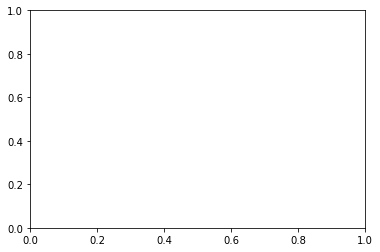

In [11]:
fig, ax = plt.subplots()

In [13]:
ax.add_patch(patch)

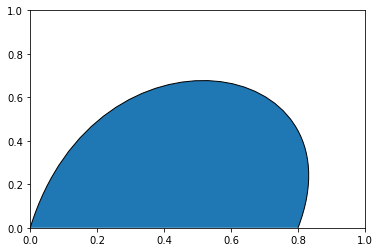

In [14]:
fig

如果点数不够呢

In [38]:
verts = [
   (0., 0.),   # P0
   (0.2, 1.),  # P1
   (1., 0.8),  # P2
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3,
]

In [39]:
path2 = Path(verts, codes)

In [40]:
patch2 = patches.PathPatch(path2, facecolor='none')

In [41]:
ax.cla()

In [42]:
ax.add_patch(patch2)

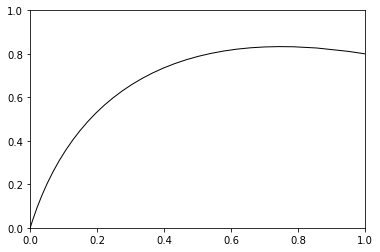

In [43]:
fig